In [14]:
import ROOT
import datetime
import os
import sys
import numpy as np
from IPython.display import Image as Plot
def destruct(object_):
    if issubclass(type(object_), ROOT.TObject):
        object_.IsA().Destructor(object_)

#Good res
g_xres = 1000
g_yres = 500
        
sys.path.insert(0, os.environ.get('PROJDIR_RATEANA'))
fermilabOffset = -6*60*60
ROOT.gStyle.SetTimeOffset(fermilabOffset);
ROOT.gStyle.SetPalette(ROOT.kRainBow);
ROOT.gStyle.SetOptStat(0)
outDir = 'Plots/'
extension = '.png'

startTime = ROOT.TDatime(2016,1,1,0,0,0).Convert()
endTime = ROOT.TDatime(2016,6,1,0,0,0).Convert()
stepSize = 24*60*60
nSteps = (endTime - startTime)/stepSize

dataDir = 'Data/uB_TPCDrift_HV01_keithleyPickOff_getVoltage_160101_160601_86400s.dat'
data = np.genfromtxt(dataDir,delimiter=" ",names=True,dtype=None)

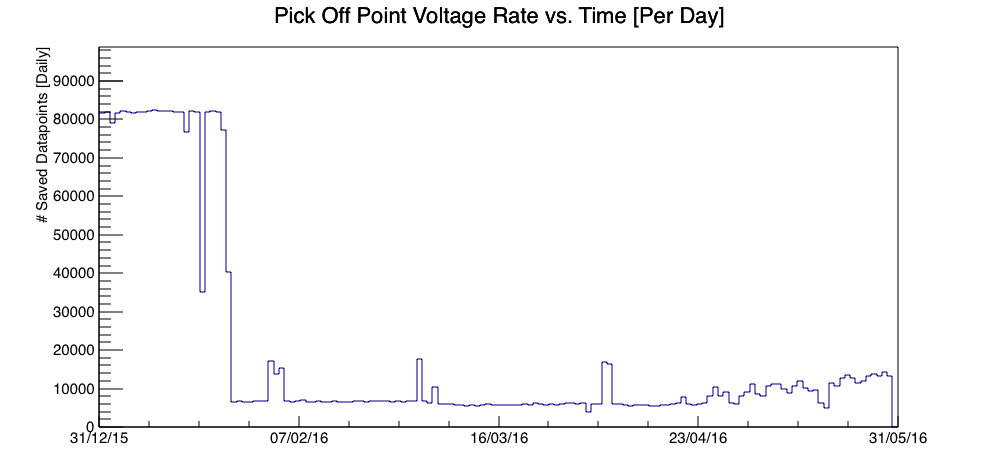

In [17]:
plotName = 'hPickOff'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
h1 = ROOT.TH1D("h1","Pick Off Point Voltage Rate vs. Time [Per Day];;# Saved Datapoints [Daily]",nSteps,startTime,endTime)
h1.GetXaxis().SetTimeDisplay(1)
h1.GetXaxis().SetNdivisions(timeDivisions,0)
h1.GetYaxis().SetRangeUser(0,max(data['Rate']*1.2))


for i in range(len(data)):
    h1.SetBinContent(h1.FindBin(data['Timestamp'][i]),data['Rate'][i])
    
h1.Draw("")

c1.SaveAs(outDir+plotName+extension)
destruct(c1)
destruct(h1)
Plot(outDir+plotName+extension)